In [2]:
!pip install koreanize_matplotlib

  Obtaining dependency information for koreanize_matplotlib from https://files.pythonhosted.org/packages/ef/91/93f56a4526d2dbead44250d9166d97568c2ce051c90eaa4be36788d59131/koreanize_matplotlib-0.1.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB 495.5 kB/s eta 0:00:16
   -- ------------------------------------- 0.6/7.9 MB 4.5 MB/s eta 0:00:02
   ------------------ --------------------- 3.6/7.9 MB 21.1 MB/s eta 0:00:01
   --------------------------- ------------ 5.4/7.9 MB 26.6 MB/s eta 0:00:01
   ------------------------------- -------- 6.2/7.9 MB 24.9 MB/s eta 0:00:01
   ---------------------------------------  7.9/7.9 MB 29.8 MB/s eta 0:00:01
   ---------------------------------------- 7.9/7.9 MB 25.4 MB/s eta 0:00:00


In [27]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ------- ------------------------------- 61.4/300.2 kB 812.7 kB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.6 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# matplolib의 한글과 음수를 깨짐없이 표현하기위해 import함
import koreanize_matplotlib

<Axes: title={'center': '한글 테스트'}>

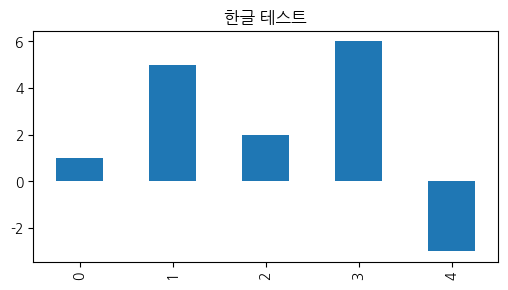

In [2]:
plt.figure(figsize=(6,3))
plt.title('한글 테스트')
pd.Series([1,5,2,6,-3]).plot.bar()

In [3]:
url = 'https://raw.githubusercontent.com/KLUE-benchmark/KLUE/main/klue_benchmark/ynat-v1.1/ynat-v1.1_train.json'
print(url)
df = pd.read_json(url)
df.shape

https://raw.githubusercontent.com/KLUE-benchmark/KLUE/main/klue_benchmark/ynat-v1.1/ynat-v1.1_train.json


(45678, 7)

In [4]:
df.head(2)

,guid,title,predefined_news_category,label,annotations,url,date
0,ynat-v1_train_00000,유튜브 내달 2일까지 크리에이터 지원 공간 운영,IT과학,생활문화,"{'annotators': ['08', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.06.30. 오전 10:36
1,ynat-v1_train_00001,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화,생활문화,"{'annotators': ['14', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.08. 오전 5:25


In [6]:
# 제목 중복 체크
df.duplicated(subset=['title']).sum()

0

In [7]:
# 결측치 확인
df.isnull().sum()

guid                        0
title                       0
predefined_news_category    0
label                       0
annotations                 0
url                         0
date                        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45678 entries, 0 to 45677
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   guid                      45678 non-null  object
 1   title                     45678 non-null  object
 2   predefined_news_category  45678 non-null  object
 3   label                     45678 non-null  object
 4   annotations               45678 non-null  object
 5   url                       45678 non-null  object
 6   date                      45678 non-null  object
dtypes: object(7)
memory usage: 2.4+ MB


In [10]:
# 문장의 길이
df['title_len']=df['title'].str.len()
df.head(2)
df['title_len'].nlargest(5),df['title_len'].nsmallest(5)

(5792     44
 20168    44
 28257    44
 30493    44
 25064    43
 Name: title_len, dtype: int64,
 4343     4
 3275     5
 17203    5
 22255    5
 22806    5
 Name: title_len, dtype: int64)

In [11]:
# 토큰 갯수
df['title_count']=df['title'].str.split().str.len()
df.head(2)

,guid,title,predefined_news_category,label,annotations,url,date,title_len,title_count
0,ynat-v1_train_00000,유튜브 내달 2일까지 크리에이터 지원 공간 운영,IT과학,생활문화,"{'annotators': ['08', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.06.30. 오전 10:36,26,7
1,ynat-v1_train_00001,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화,생활문화,"{'annotators': ['14', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.08. 오전 5:25,23,5


In [12]:
# 수치컬럼 기술통계
df[['title_len','title_count']].describe()

,title_len,title_count
count,45678.000000,45678.000000
mean,27.366544,6.611213
std,4.864236,1.460011
min,4.000000,1.000000
25%,25.000000,6.000000
50%,28.000000,7.000000
75%,31.000000,8.000000
max,44.000000,13.000000


In [13]:
df[df['title_len']==4]

,guid,title,predefined_news_category,label,annotations,url,date,title_len,title_count
4343,ynat-v1_train_04343,봄 산책,생활문화,생활문화,"{'annotators': ['12', '10', '13'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.04.05. 오후 1:51,4,2


array([[<Axes: title={'center': 'title_len'}>,
        <Axes: title={'center': 'title_count'}>]], dtype=object)

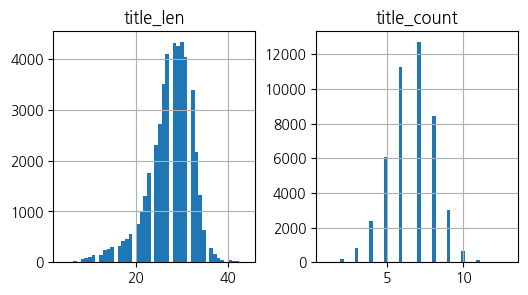

In [24]:
df[['title_len','title_count']].hist(figsize=(6,3), bins=50)

In [15]:
# 제목이 가장 긴 제목 보기
df[df['title_len'] == df['title_len'].max()]

,guid,title,predefined_news_category,label,annotations,url,date,title_len,title_count
5792,ynat-v1_train_05792,美기준금리 0.25%p 인상→0.50%∼0.75%…내년 3차례 인상 시사종합2보,세계,세계,"{'annotators': ['02', '18', '03'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.12.15. 오전 5:10,44,6
20168,ynat-v1_train_20168,그래픽 네이처 세계 연구기관 2017년 평가 발표…서울대 국내 1위·세계 70위,IT과학,사회,"{'annotators': ['12', '07', '14'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2017.09.14. 오후 2:43,44,10
28257,ynat-v1_train_28257,주말 N 여행 영남권 겨울바다 낭만…부산 갈맷길 1∼3코스 89.2㎞ 절경 즐비,생활문화,생활문화,"{'annotators': ['14', '07', '15'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.12.09. 오전 11:00,44,11
30493,ynat-v1_train_30493,MWC 2018 갤S9 64GB 출고가 95만7천원…자급제 포함 28일 예약판매,IT과학,IT과학,"{'annotators': ['13', '10', '08'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.02.26. 오전 11:00,44,9


https://github.com/amueller/word_cloud

In [19]:
from wordcloud import WordCloud

In [20]:
font_path = r'c:\windows\Fonts\malgun.ttf'

In [21]:
stopwords = ['첫','의미','등']

def display_word_cloud(data,/,*,width=1200, height=500, stopwords=[],mask=None) :
    wordcloud = WordCloud(
        font_path=font_path,
        width=width,
        height=height,    
        random_state=2024,
        background_color='#fff',
        stopwords=stopwords,  # 불용어 제거
        mask=mask,
    ).generate(data)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    return wordcloud

In [22]:
# 제목컬럼 하나의 문자열로 만들기
news_title = " ".join(df['title'])
news_title[:200]

'유튜브 내달 2일까지 크리에이터 지원 공간 운영 어버이날 맑다가 흐려져…남부지방 옅은 황사 내년부터 국가RD 평가 때 논문건수는 반영 않는다 김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것 회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간 야외서 생방송 하세요…액션캠 전용 요금제 잇따라 월드컵 태극전사 16강 전초기지 레오강 입성종합 미세먼지'

In [23]:
df['title_count'].sum()

301987

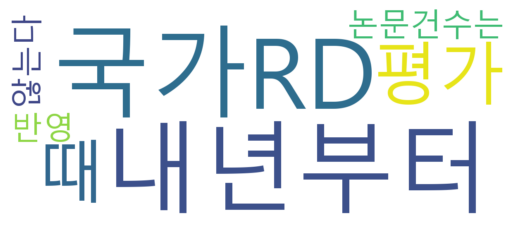

In [26]:
 display_word_cloud(df['title'][2])

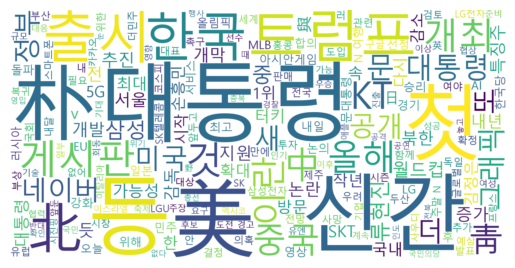

In [27]:
 display_word_cloud(news_title,width=2000, height=1000)

In [73]:
df['label'].unique()

array(['생활문화', '사회', 'IT과학', '스포츠', '세계', '정치', '경제'], dtype=object)

In [74]:
df['label'].value_counts()

label
세계      8320
스포츠     7742
정치      7379
경제      6118
생활문화    5751
IT과학    5235
사회      5133
Name: count, dtype: int64

In [76]:
subject_title = " ".join(   df.loc[ df['label'] == '세계', 'title' ])
subject_title[:200]

'왓츠앱稅 230원에 성난 레바논 민심…총리사퇴로 이어져종합2보 베트남 경제 고성장 지속…2분기 GDP 6.71% 성장 그리스서 한국전 참전 기념식…참전용사 한반도 평화 기원 美 베네수엘라 구호품 반입 촉구 안보리 결의 추진 파키스탄 경제난 속 카타르서 30억 달러 투자 유치 일본 예산팽창에 재정건전성 우려…내년에 장기채무 GDP 2배 칠레 민중가수 살해하고'

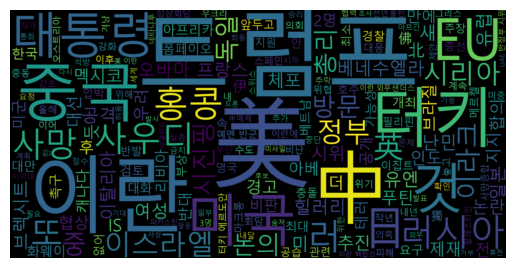

In [77]:
 display_word_cloud(subject_title,width=2000, height=1000)

In [78]:
subject_title2 = " ".join(   df.loc[ df['label'] == '생활문화', 'title' ])
subject_title2[:200]

'유튜브 내달 2일까지 크리에이터 지원 공간 운영 어버이날 맑다가 흐려져…남부지방 옅은 황사 회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간 미세먼지 속 출근길 예스24 독자들이 선정한 올해의 책 여행의 이유 울산 오후 4시 건조주의보 디자인 역사의 기둥 100권의 잡지를 돌아보다 전국 곳곳에 저녁까지 비·강한 바람…낮 최고 27도 황사·미세먼지 기승'

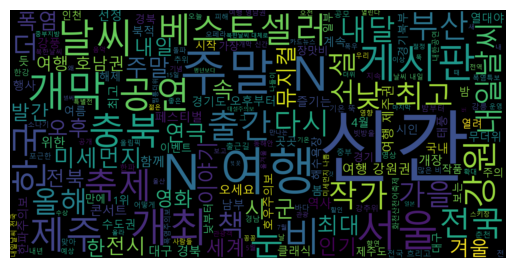

In [79]:
 display_word_cloud(subject_title2,width=2000, height=1000)

In [28]:
# 정규표현식
# 숫자 제거 [0-9], \d, [^0-9], \D
df['title2'] = df['title'].str.replace(r'\d','',regex=True)
# 문자만 남기기 [^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z]
df['title3'] = df['title'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z]',' ',regex=True)
#df['title'].str.replace('[0-9]', '', regex=True)
df['title4'] = df['title'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ',regex=True)

In [29]:
df[['title','title2','title3','title4']].head()

,title,title2,title3,title4
0,유튜브 내달 2일까지 크리에이터 지원 공간 운영,유튜브 내달 일까지 크리에이터 지원 공간 운영,유튜브 내달 일까지 크리에이터 지원 공간 운영,유튜브 내달 일까지 크리에이터 지원 공간 운영
1,어버이날 맑다가 흐려져…남부지방 옅은 황사,어버이날 맑다가 흐려져…남부지방 옅은 황사,어버이날 맑다가 흐려져 남부지방 옅은 황사,어버이날 맑다가 흐려져 남부지방 옅은 황사
2,내년부터 국가RD 평가 때 논문건수는 반영 않는다,내년부터 국가RD 평가 때 논문건수는 반영 않는다,내년부터 국가RD 평가 때 논문건수는 반영 않는다,내년부터 국가 평가 때 논문건수는 반영 않는다
3,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,회색인간 작가 김동식 양심고백 등 새 소설집 권 출간,회색인간 작가 김동식 양심고백 등 새 소설집 권 출간,회색인간 작가 김동식 양심고백 등 새 소설집 권 출간


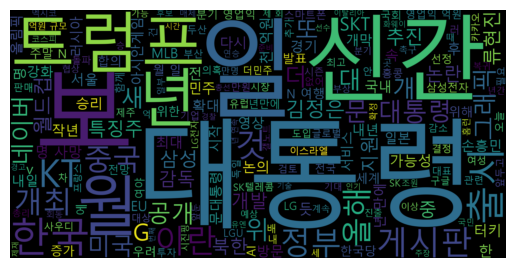

In [86]:
 display_word_cloud(' '.join(df['title3']),width=2000, height=1000)

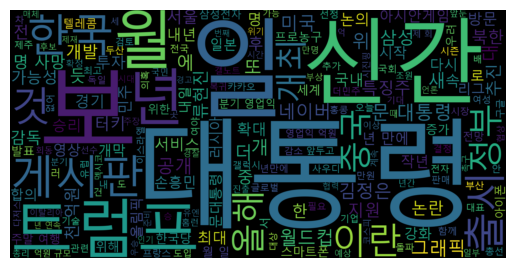

In [89]:
display_word_cloud(' '.join(df['title4']),width=2000, height=1000)

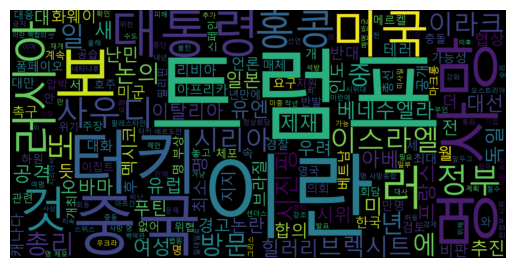

In [91]:
subject_title4 = " ".join(df.loc[df['label'] == '세계', 'title4'])
display_word_cloud(subject_title4,width=2000, height=1000)

### 형태소 분석기로 특정 품사만 추출하기
[hyunwoongko/pecab: Pecab: Pure python Korean morpheme analyzer based on Mecab](https://github.com/hyunwoongko/pecab)

In [92]:
!pip install pecab

     ---------------------------------------- 0.0/26.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/26.4 MB ? eta -:--:--
     --------------------------------------- 0.0/26.4 MB 435.7 kB/s eta 0:01:01
     ---------------------------------------- 0.1/26.4 MB 1.1 MB/s eta 0:00:25
     - -------------------------------------- 1.1/26.4 MB 8.0 MB/s eta 0:00:04
     ----- ---------------------------------- 3.4/26.4 MB 18.0 MB/s eta 0:00:02
     -------- ------------------------------- 5.7/26.4 MB 24.3 MB/s eta 0:00:01
     ----------- ---------------------------- 7.8/26.4 MB 27.5 MB/s eta 0:00:01
     -------------- ------------------------- 9.7/26.4 MB 29.6 MB/s eta 0:00:01
     ----------------- --------------------- 11.8/26.4 MB 46.7 MB/s eta 0:00:01
     -------------------- ------------------ 13.9/26.4 MB 43.5 MB/s eta 0:00:01
     ----------------------- --------------- 15.7/26.4 MB 43.5 MB/s eta 0:00:01
     ----------------------- --------------- 15.7/26.4 MB 

In [31]:
# 가장 긴 제목 가져오기
df.loc[df['title_len'] == df['title_len'].max(), 'title']

5792     美기준금리 0.25%p 인상→0.50%∼0.75%…내년 3차례 인상 시사종합2보
20168    그래픽 네이처 세계 연구기관 2017년 평가 발표…서울대 국내 1위·세계 70위
28257    주말 N 여행 영남권 겨울바다 낭만…부산 갈맷길 1∼3코스 89.2㎞ 절경 즐비
30493    MWC 2018 갤S9 64GB 출고가 95만7천원…자급제 포함 28일 예약판매
Name: title, dtype: object

In [32]:
df.loc[20168,'title']

'그래픽 네이처 세계 연구기관 2017년 평가 발표…서울대 국내 1위·세계 70위'

In [33]:
from pecab import PeCab

In [99]:
pecab = PeCab()
pecab.nouns(df.loc[20168,'title'])

['그래픽', '네이처', '세계', '연구', '기관', '년', '평가', '발표', '서울대', '국내', '위', '세계', '위']

In [118]:
# 사회 부문 기사제목 1000건 무작위 추출
df_society = df.loc[df['label'] == '사회'].sample(1000,random_state=2024).copy()
df_society.shape

(1000, 12)

In [123]:
# 시간이 오래 걸리는 작업시 시각적으로 진행상황 수치로( %) 보여준다.
from tqdm import tqdm
tqdm.pandas()

df_society['title_none'] = df_society['title'].progress_map(lambda x: ' '.join(pecab.nouns(x)))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.90it/s]


In [127]:
df_society[['title','title2','title3','title4','title_none']].head()

,title,title2,title3,title4,title_none
10524,송재 서재필 언론인상 제정 내달 7일 첫 시상식,송재 서재필 언론인상 제정 내달 일 첫 시상식,송재 서재필 언론인상 제정 내달 일 첫 시상식,송재 서재필 언론인상 제정 내달 일 첫 시상식,송 재 서재필 언론 인상 제정 내달 일 시상식
34438,중소기업 상생 힘쓴다…다음 달 네이버 커넥트 2017 개최,중소기업 상생 힘쓴다…다음 달 네이버 커넥트 개최,중소기업 상생 힘쓴다 다음 달 네이버 커넥트 개최,중소기업 상생 힘쓴다 다음 달 네이버 커넥트 개최,중소기업 상생 힘 다음 달 네이버 커넥트 개
19087,5·18에 관한 5가지 미스터리에 답하다,·에 관한 가지 미스터리에 답하다,에 관한 가지 미스터리에 답하다,에 관한 가지 미스터리에 답하다,가지 미스터리 답
31496,국립여성사전시관장 수많은 여성독립운동가 존재 알리고 싶다,국립여성사전시관장 수많은 여성독립운동가 존재 알리고 싶다,국립여성사전시관장 수많은 여성독립운동가 존재 알리고 싶다,국립여성사전시관장 수많은 여성독립운동가 존재 알리고 싶다,국립 여성 사 전시 관장 여성 독립운동가 존재
31290,佛 전동스쿠터 사망사고 잇따라…피해자들 규제강화 촉구,佛 전동스쿠터 사망사고 잇따라…피해자들 규제강화 촉구,전동스쿠터 사망사고 잇따라 피해자들 규제강화 촉구,전동스쿠터 사망사고 잇따라 피해자들 규제강화 촉구,佛 전동 스쿠터 사망 사고 피해자 규제 강화 촉구


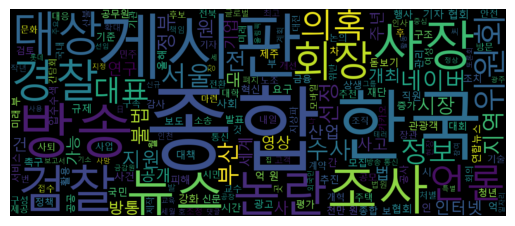

In [165]:
stopwords = ['명','일','년','만','위','등','천','중','개']
wordcloud_society = display_word_cloud(' '.join(df_society['title_none']), stopwords=stopwords)

In [162]:
dir(wordcloud_society)

['__array__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_generated',
 '_draw_contour',
 '_get_bolean_mask',
 'background_color',
 'collocation_threshold',
 'collocations',
 'color_func',
 'colormap',
 'contour_color',
 'contour_width',
 'fit_words',
 'font_path',
 'font_step',
 'generate',
 'generate_from_frequencies',
 'generate_from_text',
 'height',
 'include_numbers',
 'layout_',
 'margin',
 'mask',
 'max_font_size',
 'max_words',
 'min_font_size',
 'min_word_length',
 'mode',
 'normalize_plurals',
 'prefer_horizontal',
 'process_text',
 'random_state',
 'recolor',
 'regexp',
 'relative_scaling',
 'repeat',
 'scale',
 'stopwords',
 'to

In [166]:
wordcloud_society.words_

{'종합': 1.0,
 '한국': 0.64,
 '게시판': 0.56,
 '방송': 0.38666666666666666,
 '사장': 0.30666666666666664,
 '조사': 0.29333333333333333,
 '검찰': 0.28,
 '뉴스': 0.28,
 '논란': 0.26666666666666666,
 '대상': 0.26666666666666666,
 '경찰': 0.25333333333333335,
 '회장': 0.25333333333333335,
 '언론': 0.22666666666666666,
 '의혹': 0.22666666666666666,
 '위원회': 0.22666666666666666,
 '대표': 0.22666666666666666,
 '정보': 0.22666666666666666,
 '서울': 0.22666666666666666,
 '네이버': 0.2,
 '수사': 0.2,
 '부산': 0.2,
 '지역': 0.2,
 '전': 0.2,
 '선정': 0.18666666666666668,
 '시장': 0.18666666666666668,
 '원': 0.18666666666666668,
 '지원': 0.18666666666666668,
 '불법': 0.18666666666666668,
 '정부': 0.18666666666666668,
 '인터넷': 0.18666666666666668,
 '개최': 0.18666666666666668,
 '대': 0.18666666666666668,
 '산업': 0.18666666666666668,
 '방통': 0.17333333333333334,
 '법': 0.17333333333333334,
 '사': 0.16,
 '사고': 0.16,
 '영상': 0.16,
 '공개': 0.16,
 '주년': 0.16,
 '세계': 0.16,
 '연구': 0.16,
 '기업': 0.16,
 '가능': 0.16,
 '건': 0.16,
 '기자 협회': 0.16,
 '규제': 0.14666666666666667,
 '강화

<Axes: >

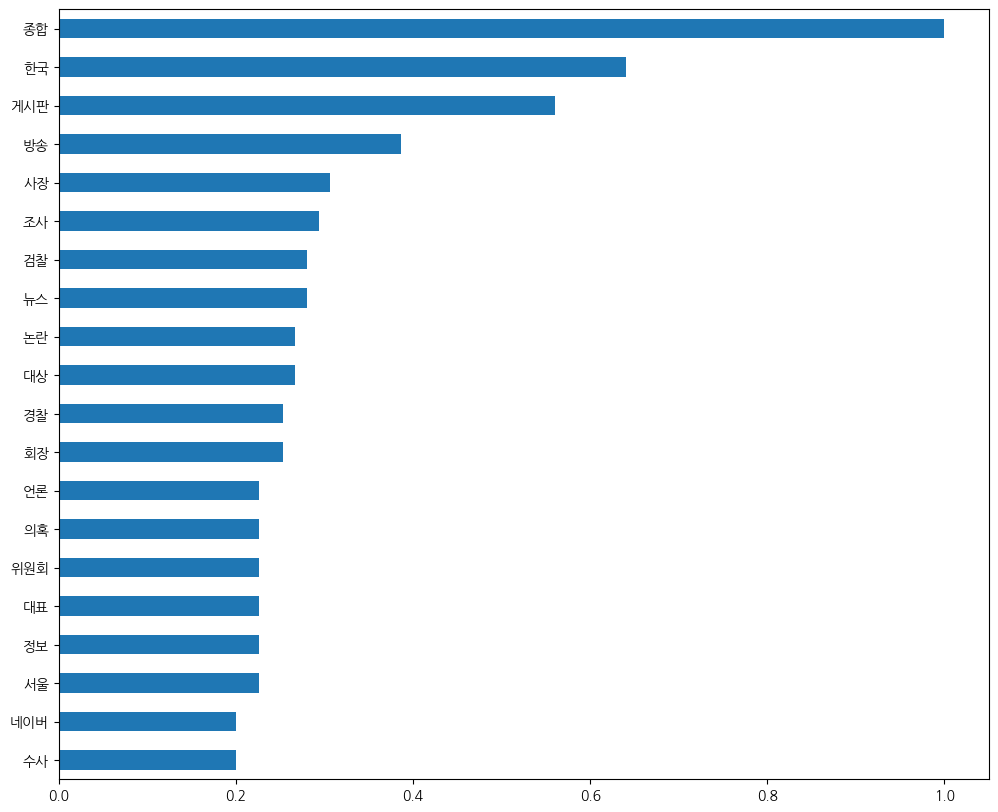

In [171]:
plt.figure(figsize=(12,10))
wordcloud_society_s = pd.Series(wordcloud_society.words_)
wordcloud_society_s.nlargest(20).sort_values(ascending=True).plot.barh()

In [244]:
import requests
from PIL import Image

# mask_img_path = 'https://cdn.pixabay.com/photo/2016/04/01/08/48/architecture-1298980_1280.png'
mask_img_path = "https://raw.githubusercontent.com/amueller/word_cloud/main/examples/alice_mask.png"
# 이미지 다운로드
response = requests.get(mask_img_path)

# http요청이 성공적으로 수행됐으면 이미지를 로컬에 저장
if response.status_code == 200:
    with open('alice_mask.png','wb') as file:
        file.write(response.content)

        
mask_img = np.array(Image.open('alice_mask.png'))

In [ ]:
print(mask_img_path)

In [ ]:
mask_img.shape

In [ ]:
def display_word_cloud_2(data,/,*,width=1200, height=500, stopwords=[],mask=None) :
    wordcloud = WordCloud(
        font_path=font_path,
        width=width,
        height=height,    
        random_state=2024,
        background_color='#fff',
        stopwords=stopwords,  # 불용어 제거
        mask=mask,
    ).generate(data)    
    
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

    return wordcloud

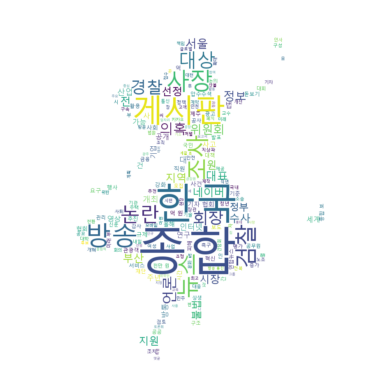

In [245]:
stopwords = ['명','일','년','만','위','등','천','중','개']
wordcloud_society = display_word_cloud_2(' '.join(df_society['title_none']), stopwords=stopwords, mask=mask_img)